In [1]:
import os 
import sys
import numpy as np
from scr.lattice import Lattice
from scr.random_walk import RandomWalk
from scr.simulation import Simulation
from scr.utils import make_video
from tqdm import tqdm 
from matplotlib import pyplot as plt

## Dimension 1

In [2]:
simu_name = "plot_dim1"
os.mkdir(simu_name)
os.mkdir(simu_name + "/frames")
# os.mkdir(simu_name + "/one_particle")
# os.mkdir(simu_name + "/one_particle/frames")
# os.mkdir(simu_name + "/several_particles")
# os.mkdir(simu_name + "/several_particles/frames")
# os.mkdir(simu_name + "/many_particles")
# os.mkdir(simu_name + "/many_particles/frames")


### Initialize

In [3]:
fig = plt.figure(figsize=(18,6))
subfigs = fig.subfigures(1,3)

<Figure size 1800x600 with 0 Axes>

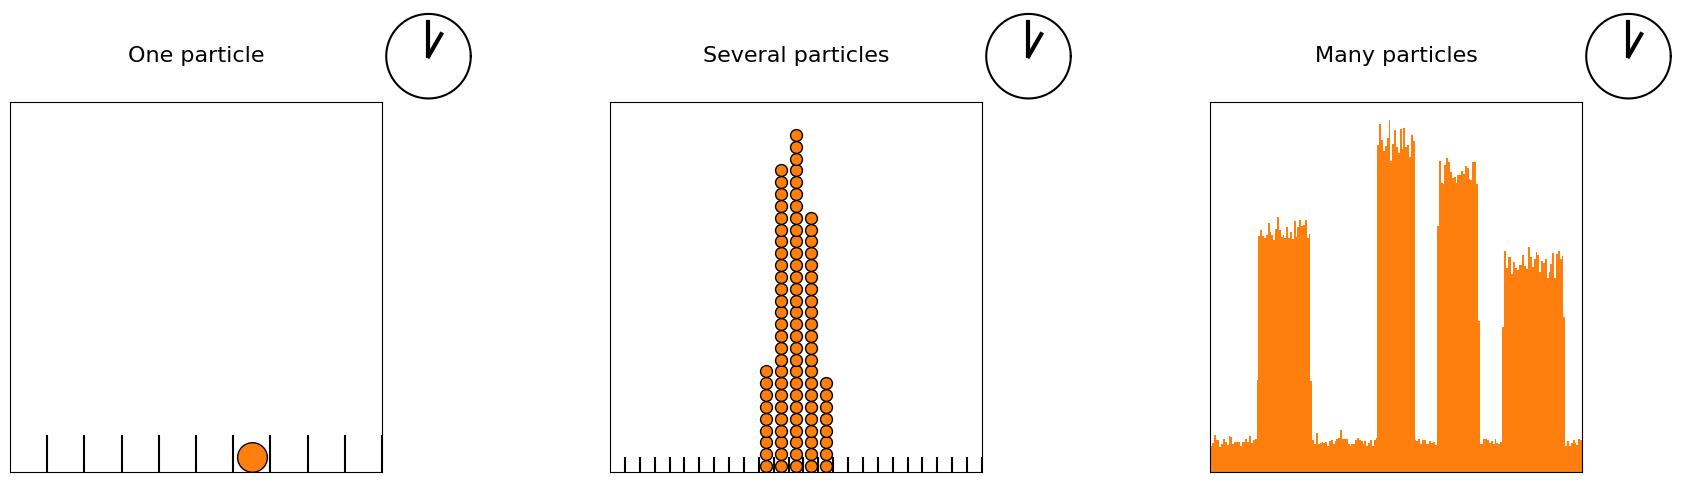

In [4]:
"""One particle"""
N1 = 1
L1 = 10
lat1 = Lattice(dim=1,L=L1,fig=subfigs[0])
rw1 = RandomWalk(x=np.array([L1/2.+1]),compute_y=True,bound=L1,bc="reflecting")
simu1 = Simulation(rw1,lat1,N_nbgh_plot=0,N_traj_plot=0)
simu1.lat.set_height(10)
simu1.lat.ax.set_xlim(-0.5,L1-0.5)
simu1.lat.set_title("One particle")

"""Several particles"""
N2 = 94
L2 = 25
lat2 = Lattice(dim=1,L=L2,fig=subfigs[1])
# rw2 = RandomWalk(x=np.floor(L2/2 + np.random.randn(N2)*L2/16) % L2,compute_y=True,bound=L2)
rw2 = RandomWalk(x=np.floor(L2/2 + 2*(np.random.rand(N2)-0.5)*L2/14) % L2,compute_y=True,bound=L2)
simu2 = Simulation(rw2,lat2,N_nbgh_plot=0,N_traj_plot=0)
simu2.lat.set_height(25)
simu2.lat.ax.set_xlim(-0.5,L2-0.5)
simu2.lat.set_title("Several particles")


"""Many particles"""
N3 = 100000
N3_4 = int(N3/4)
L3 = 200
lat3 = Lattice(dim=1,L=L3,fig=subfigs[2])
x0 = np.floor(L3*np.random.rand(N3_4)) % L3
x1 = np.floor(L3/2 + 2*(np.random.rand(N3_4)-0.5)*L3/20) % L3
x2 = np.floor(2*L3/3 + 2*(np.random.rand(N3_4)-0.5)*L3/18) % L3
x3 = np.floor(0.2*L3 + 2*(np.random.rand(N3_4)-0.5)*L3/14) % L3
x4 = np.floor(0.87*L3 + 2*(np.random.rand(N3_4)-0.5)*L3/12) % L3
rw3 = RandomWalk(x=np.concatenate((x0,x1,x2,x3,x4),axis=0),compute_y=False,bound=L3)
simu3 = Simulation(rw3,lat3,N_nbgh_plot=0,N_traj_plot=0)
simu3.lat.set_height(max(1.05*simu3.histo.get_data()[0].max(),simu3.lat.ax.get_ylim()[1]))
simu3.lat.ax.set_xlim(-0.5,L3-0.5)
simu3.lat.set_title("Many particles")
simu3.histo.set()

dt = 0.00005
simu1.rw.dt = dt
simu2.rw.dt = dt
simu3.rw.dt = dt

fig

### Speed parameters

In [5]:
base_rate = 3.0

simu1.rw.rate = base_rate * 2
simu1.clock_rate = 1.0

simu2.rw.rate = base_rate * 4
simu2.clock_rate = 1.0 * 4
simu2.rw.falling_rate = 400.0

simu3.rw.rate = base_rate * 174
simu3.clock_rate = 1.0 * 42

### Run simulation

In [6]:
t_iter = 0
# ext1 = subfigs[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# ext2 = subfigs[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# ext3 = subfigs[2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())

for k in tqdm(range(120000)):
    simu1.update()
    simu2.update()
    simu3.update()
    if k%200==0:
        fig.savefig(simu_name + "/frames/" + f"t_{t_iter}.png")
        # fig.savefig(simu_name + "/one_particle" + "/frames/" + f"t_{t_iter}.png",bbox_inches=ext1)
        # fig.savefig(simu_name + "/several_particles" + "/frames/" + f"t_{t_iter}.png",bbox_inches=ext2)
        # fig.savefig(simu_name + "/many_particles" + "/frames/" + f"t_{t_iter}.png",bbox_inches=ext3)
        t_iter +=1

100%|██████████| 120000/120000 [17:29<00:00, 114.35it/s]


### Final step

In [7]:
make_video(simu_name=simu_name,video_name=simu_name)
# make_video(simu_name=simu_name+"/one_particle",video_name=simu_name+"_one")
# make_video(simu_name=simu_name+"/several_particles",video_name=simu_name+"_several")
# make_video(simu_name=simu_name+"/many_particles",video_name=simu_name+"_many")